In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

sc.settings.verbosity = 3
sc.set_figure_params(dpi=80, dpi_save=100)

In [2]:
SCRNA_DIR = '../data/kotliarov-2020/rna/'
SCCITE_DIR = '../data/kotliarov-2020/cite/'
META_PATH = '../data/kotliarov-2020/annotation.csv'

In [28]:
scrna = sc.read_10x_mtx(SCRNA_DIR + 'raw', cache=True)

... reading from cache file cache/..-data-kotliarov-2020-rna-raw-matrix.h5ad


In [29]:
cite = sc.read_10x_mtx(SCCITE_DIR + 'raw', cache=True)

... reading from cache file cache/..-data-kotliarov-2020-cite-raw-matrix.h5ad


In [30]:
anno = pd.read_csv(META_PATH)

In [31]:
anno

,V1,V2,V3,V4,V5,V6
0,AAACCTGAGAGCCCAA_H1B1ln1,1,C5,C5.0,C5.0.0,256_d0
1,AAACCTGAGGCGTACA_H1B1ln1,1,C6,C6.0,C6.0.0,273_d0
2,AAACCTGCAGGTGGAT_H1B1ln1,1,C0,C0.0,C0.0.0,256_d0
3,AAACCTGCAGTATCTG_H1B1ln1,1,C0,C0.0,C0.0.0,200_d0
4,AAACCTGCATCACAAC_H1B1ln1,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...,...
53196,TTTGTCAGTACGACCC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
53197,TTTGTCAGTCAAACTC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
53198,TTTGTCATCCCATTTA_H1B2ln6,2,C5,C5.0,C5.0.0,268_d0
53199,TTTGTCATCGAGAACG_H1B2ln6,2,C2,C2.0,C2.0.0,234_d0


In [32]:
anno = anno.rename(columns={"V1": "cell", "V2": "batch", "V3": "cluster_level1", "V4": "cluster_level2", "V5": "cluster_level3", "V6": "sample"})

In [34]:
anno["batch"] = anno["batch"].astype('category')

In [35]:
anno = anno.set_index('cell')

In [36]:
anno

,batch,cluster_level1,cluster_level2,cluster_level3,sample
cell,,,,,
AAACCTGAGAGCCCAA_H1B1ln1,1,C5,C5.0,C5.0.0,256_d0
AAACCTGAGGCGTACA_H1B1ln1,1,C6,C6.0,C6.0.0,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,1,C0,C0.0,C0.0.0,256_d0
AAACCTGCAGTATCTG_H1B1ln1,1,C0,C0.0,C0.0.0,200_d0
AAACCTGCATCACAAC_H1B1ln1,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
TTTGTCATCCCATTTA_H1B2ln6,2,C5,C5.0,C5.0.0,268_d0


## Preproces scRNA-seq

In [37]:
scrna.var = scrna.var.rename(columns={'gene_ids': 'gene_symbols'})

In [38]:
scrna.var_names_make_unique()

normalizing counts per cell
    finished (0:00:01)


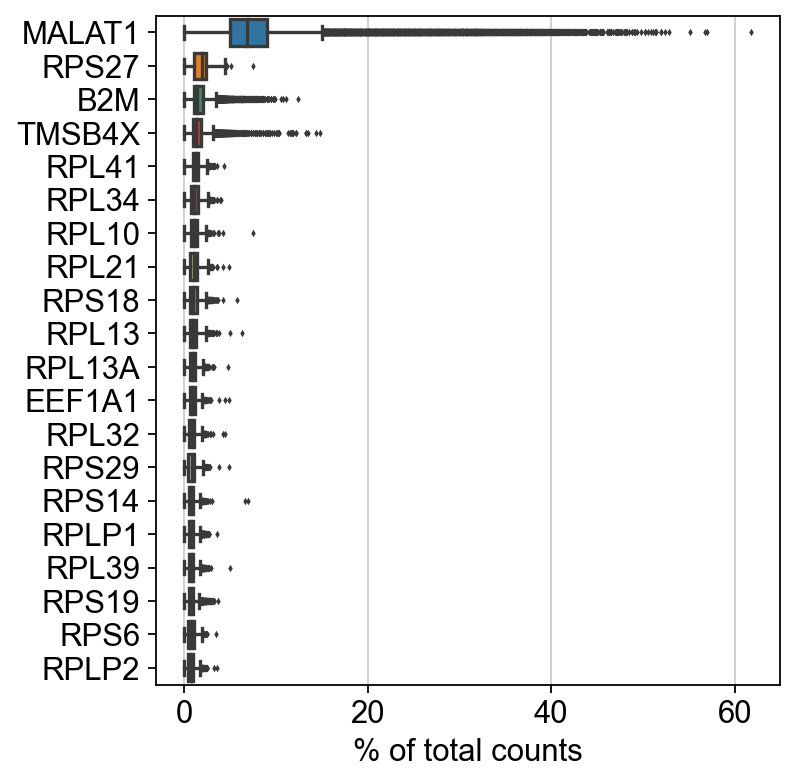

In [39]:
sc.pl.highest_expr_genes(scrna, n_top=20)

In [40]:
sc.pp.filter_cells(scrna, min_genes=1)
sc.pp.filter_genes(scrna, min_cells=1)
scrna

/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 9093 genes that are detected in less than 1 cells


AnnData object with n_obs × n_vars = 58654 × 23645
    obs: 'n_genes'
    var: 'gene_symbols', 'n_cells'

In [41]:
scrna.raw = scrna

### QC

In [42]:
# no MT genes
sc.pp.calculate_qc_metrics(scrna, percent_top=None, inplace=True)
scrna

AnnData object with n_obs × n_vars = 58654 × 23645
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


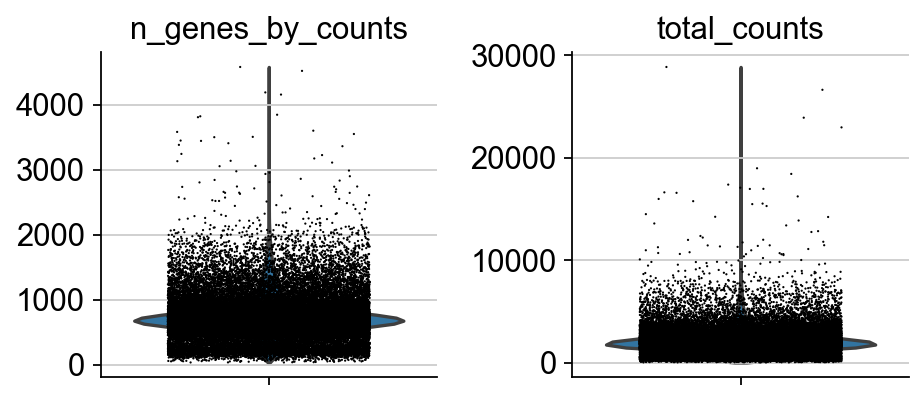

In [43]:
sc.pl.violin(scrna, ['n_genes_by_counts', 'total_counts'], jitter=0.3, multi_panel=True)

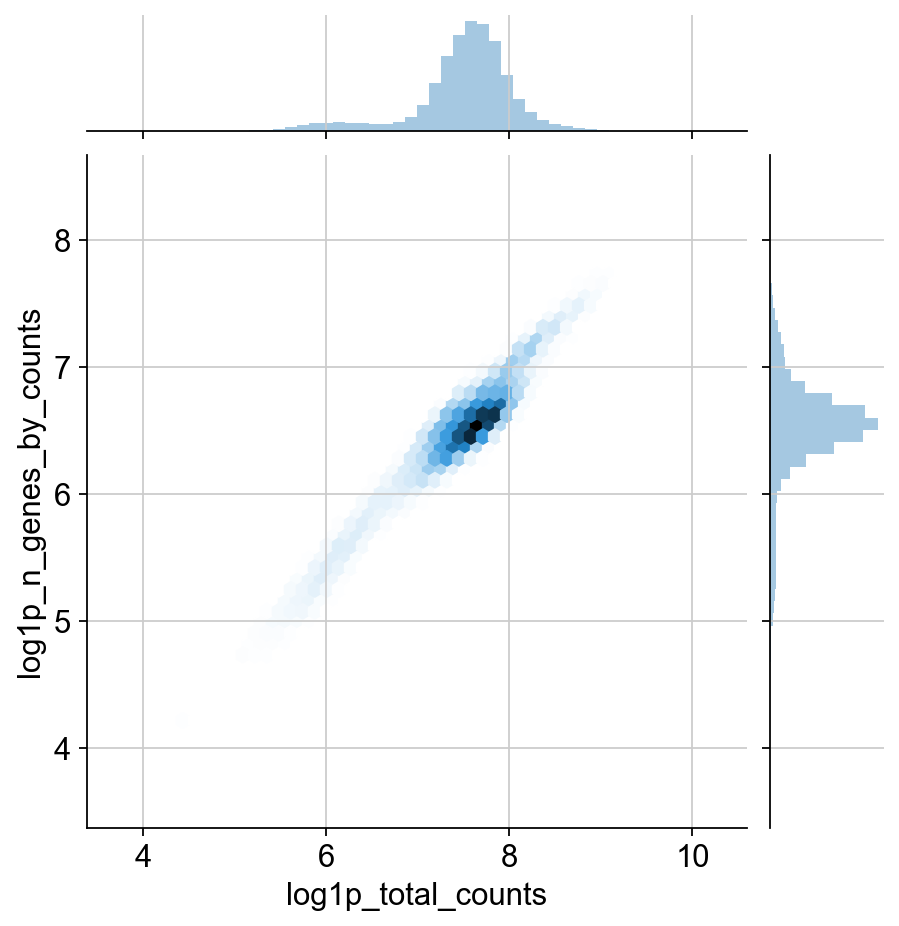

In [44]:
sns.jointplot("log1p_total_counts", "log1p_n_genes_by_counts", data=scrna.obs, kind='hex')

/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


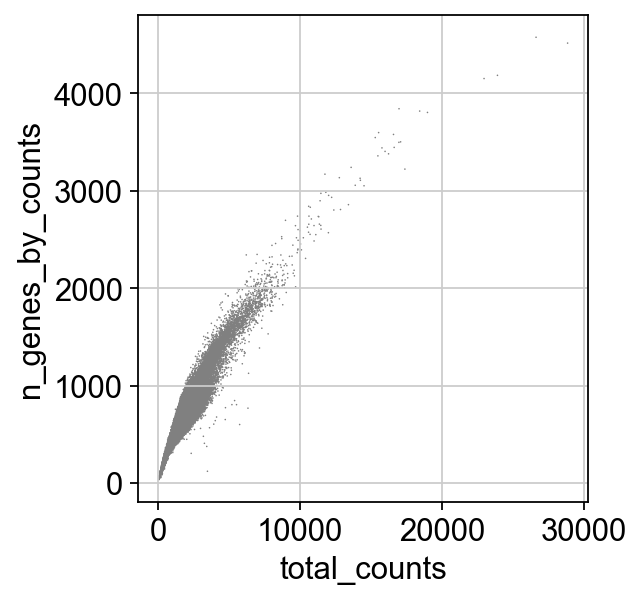

In [45]:
sc.pl.scatter(scrna, x='total_counts', y='n_genes_by_counts')

In [46]:
sc.pp.filter_cells(scrna, min_genes=100)
sc.pp.filter_genes(scrna, min_cells=3)
scrna = scrna[scrna.obs.n_genes_by_counts < 2000, :]
scrna

filtered out 130 cells that have less than 100 genes expressed


/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 3186 genes that are detected in less than 3 cells


/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 58333 × 20459
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

### Normalization

In [47]:
sc.pp.normalize_total(scrna, target_sum=1e4)
sc.pp.log1p(scrna)

/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:01)


### Extract highly variable genes

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


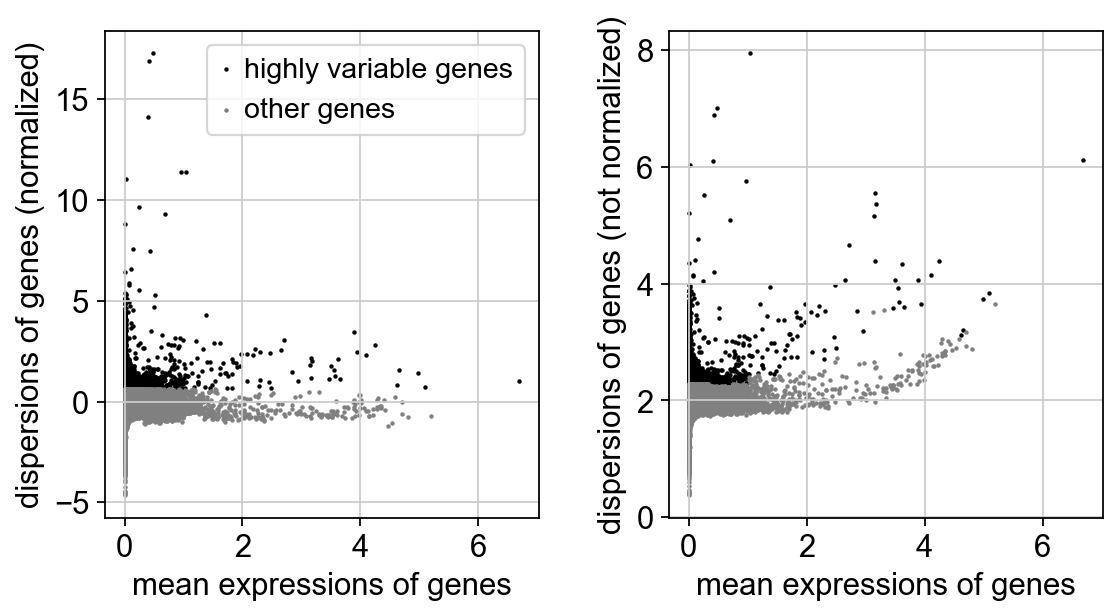

number of highly variable genes = 3999


In [48]:
sc.pp.highly_variable_genes(scrna, n_top_genes=4000)
sc.pl.highly_variable_genes(scrna)
print('number of highly variable genes =', scrna.var.highly_variable.sum())

In [49]:
scrna = scrna[:, scrna.var.highly_variable]
scrna

View of AnnData object with n_obs × n_vars = 58333 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

### Add cell type labels

In [50]:
scrna.obs = scrna.obs.join(anno, how='left', sort=False)

In [51]:
scrna = scrna[~scrna.obs['cluster_level1'].isnull()]

In [52]:
scrna.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,batch,cluster_level1,cluster_level2,cluster_level3,sample
AAACCTGAGAGCCCAA_H1B1ln1,723,723,6.584791,1567.0,7.357556,1,C5,C5.0,C5.0.0,256_d0
AAACCTGAGGCGTACA_H1B1ln1,776,776,6.655440,2754.0,7.921173,1,C6,C6.0,C6.0.0,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,673,673,6.513230,2485.0,7.818430,1,C0,C0.0,C0.0.0,256_d0
AAACCTGCAGTATCTG_H1B1ln1,595,595,6.390241,1803.0,7.497762,1,C0,C0.0,C0.0.0,200_d0
AAACCTGCATCACAAC_H1B1ln1,707,707,6.562444,1678.0,7.425954,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,710,710,6.566672,1869.0,7.533694,2,C7,C7.0,C7.0.0,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,881,881,6.782192,2313.0,7.746733,2,C7,C7.0,C7.0.0,205_d0
TTTGTCATCCCATTTA_H1B2ln6,743,743,6.612041,1943.0,7.572503,2,C5,C5.0,C5.0.0,268_d0
TTTGTCATCGAGAACG_H1B2ln6,1006,1006,6.914731,2545.0,7.842279,2,C2,C2.0,C2.0.0,234_d0


### Visualize

In [53]:
sc.tl.pca(scrna, random_state=0, svd_solver='arpack', n_comps=50)

computing PCA
    on highly variable genes


/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    with n_comps=50
    finished (0:00:07)


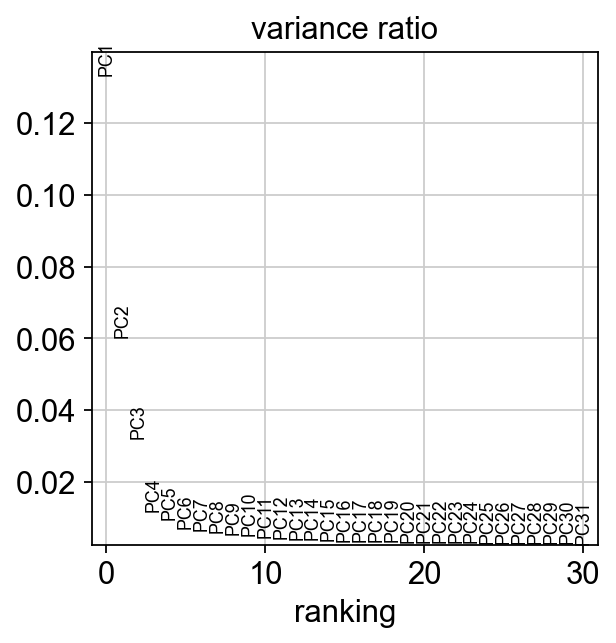

In [54]:
sc.pl.pca_variance_ratio(scrna)

In [55]:
sc.pp.neighbors(scrna, n_pcs=7)
sc.tl.umap(scrna)

computing neighbors
    using 'X_pca' with n_pcs = 7
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:46)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:00)


/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'cluster_level1' as categorical
... storing 'cluster_level2' as categorical
... storing 'cluster_level3' as categorical
... storing 'sample' as categorical


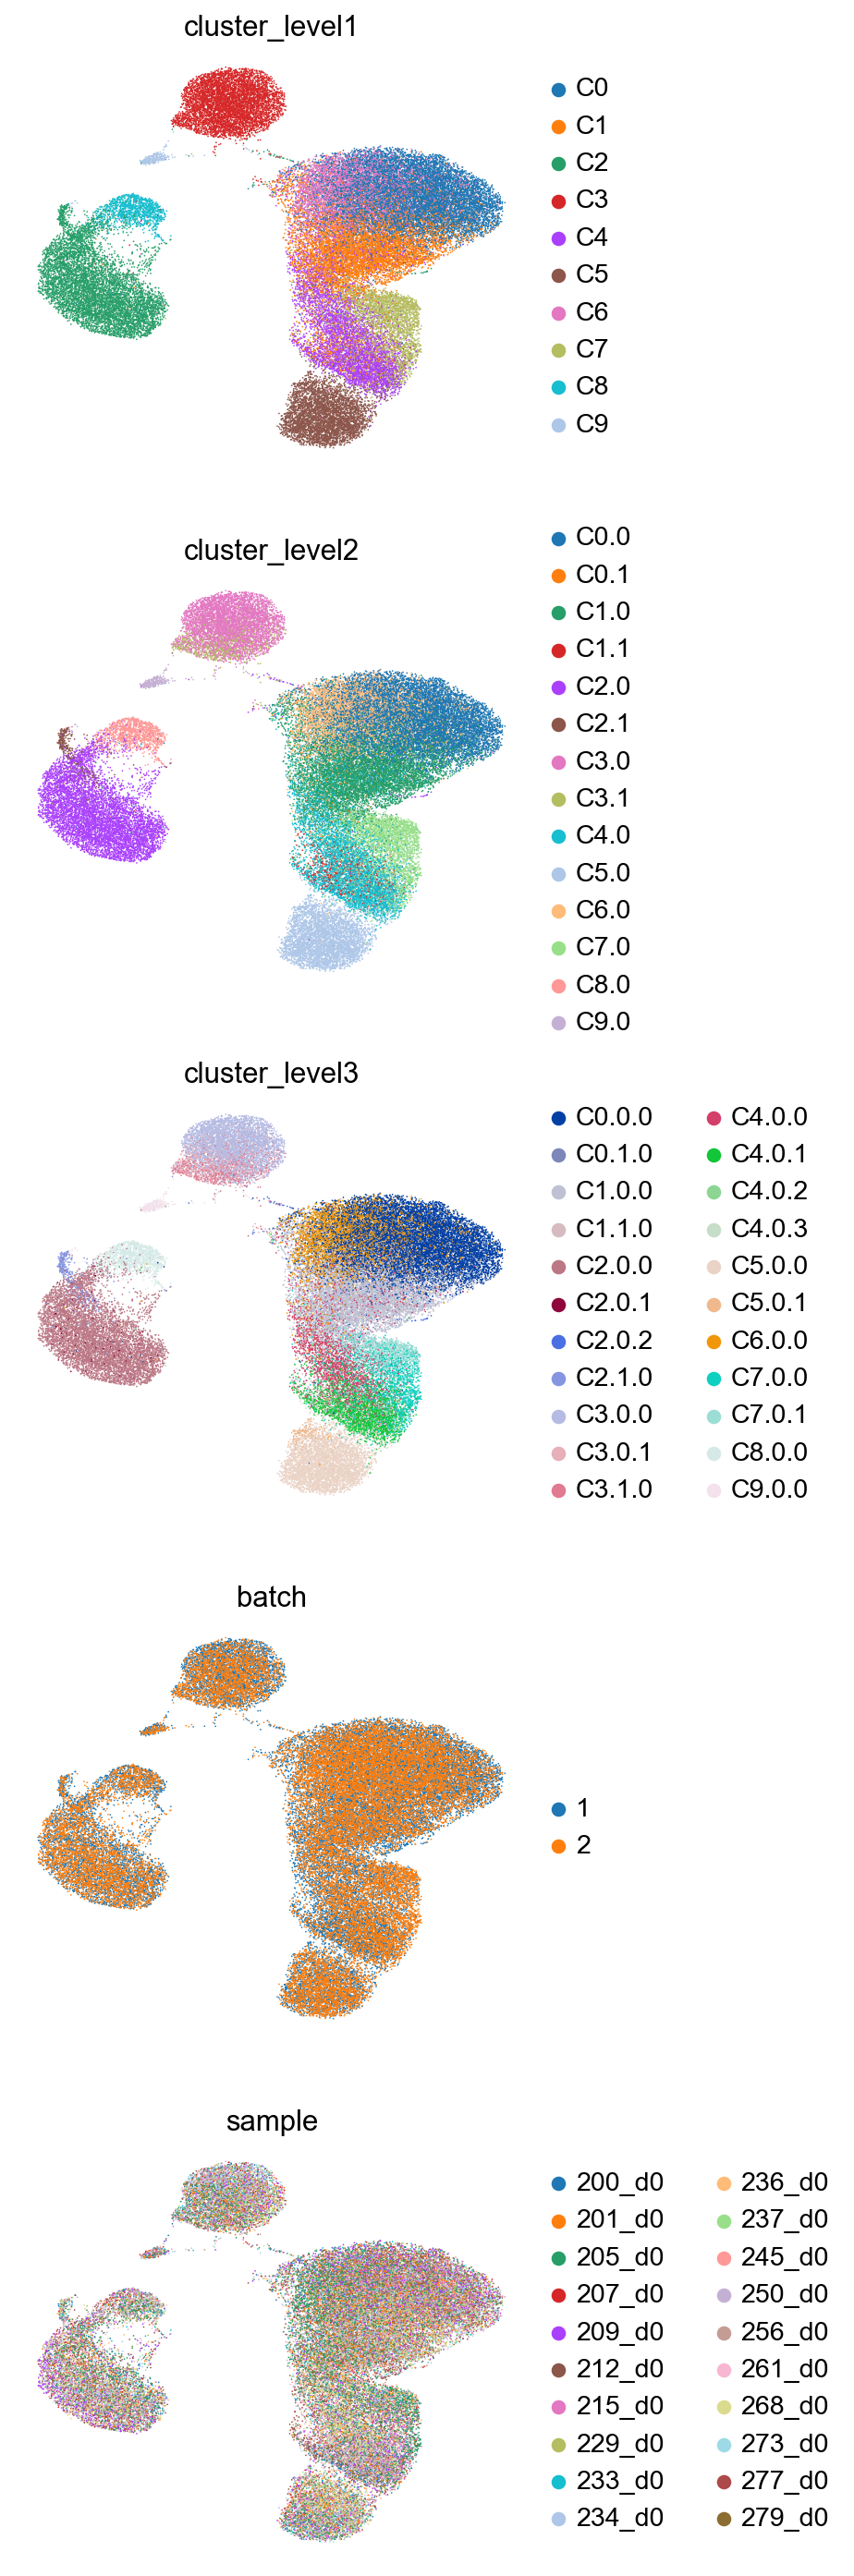

In [56]:
sc.pl.umap(scrna, color=['cluster_level1', 'cluster_level2', 'cluster_level3', 'batch', 'sample'], frameon=False, ncols=1)

## Preproces CITE-seq

In [57]:
cite

AnnData object with n_obs × n_vars = 58654 × 87
    var: 'gene_ids'

In [58]:
cite.var = cite.var.rename(columns={'gene_ids': 'gene_symbols'})

In [59]:
cite.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


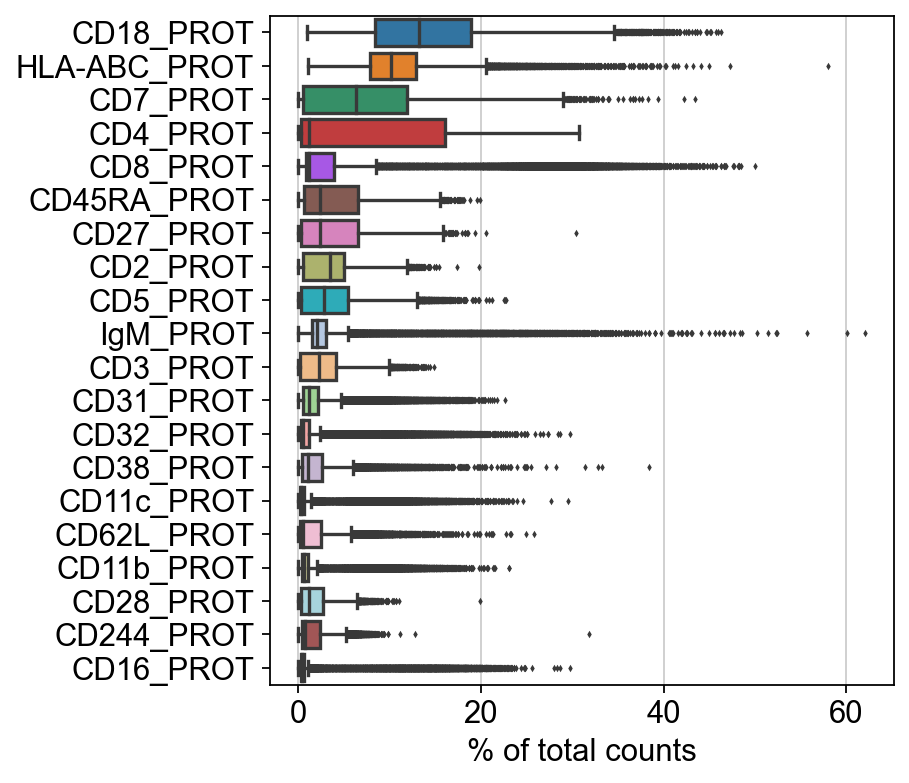

In [60]:
sc.pl.highest_expr_genes(cite, n_top=20)

In [61]:
sc.pp.filter_cells(cite, min_genes=1)
sc.pp.filter_genes(cite, min_cells=1)
cite

/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 58654 × 87
    obs: 'n_genes'
    var: 'gene_symbols', 'n_cells'

In [62]:
cite.raw = cite

### Normalize

In [63]:
sc.pp.normalize_total(cite, target_sum=1e4)
sc.pp.log1p(cite)

normalizing counts per cell
    finished (0:00:00)


In [64]:
cite.obs = cite.obs.join(anno, how='left', sort=False)

In [65]:
cite = cite[~cite.obs['cluster_level1'].isnull()]

In [66]:
cite.obs

,n_genes,batch,cluster_level1,cluster_level2,cluster_level3,sample
AAACCTGAGAGCCCAA_H1B1ln1,71,1,C5,C5.0,C5.0.0,256_d0
AAACCTGAGGCGTACA_H1B1ln1,64,1,C6,C6.0,C6.0.0,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,70,1,C0,C0.0,C0.0.0,256_d0
AAACCTGCAGTATCTG_H1B1ln1,67,1,C0,C0.0,C0.0.0,200_d0
AAACCTGCATCACAAC_H1B1ln1,74,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,76,2,C7,C7.0,C7.0.0,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,77,2,C7,C7.0,C7.0.0,205_d0
TTTGTCATCCCATTTA_H1B2ln6,79,2,C5,C5.0,C5.0.0,268_d0
TTTGTCATCGAGAACG_H1B2ln6,83,2,C2,C2.0,C2.0.0,234_d0


### Visualize

In [67]:
sc.tl.pca(cite, random_state=0, svd_solver='arpack', use_highly_variable=False)

computing PCA
    with n_comps=50
    finished (0:00:01)


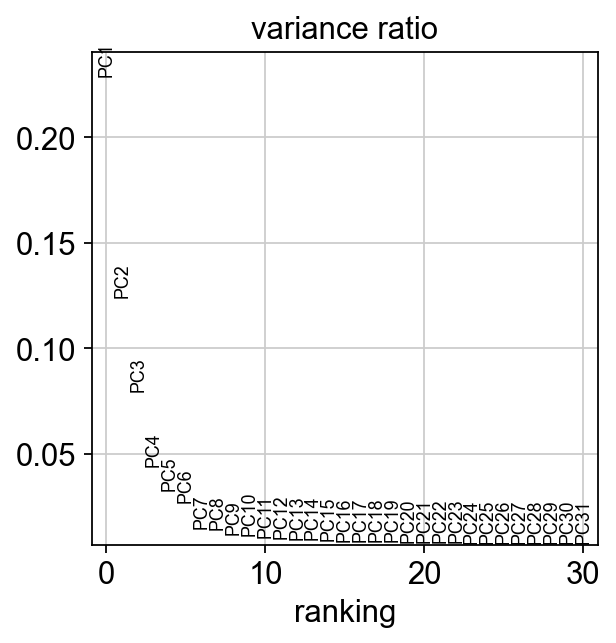

In [68]:
sc.pl.pca_variance_ratio(cite)

In [69]:
sc.pp.neighbors(cite, n_pcs=10)
sc.tl.umap(cite)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:05)


/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'cluster_level1' as categorical
... storing 'cluster_level2' as categorical
... storing 'cluster_level3' as categorical
... storing 'sample' as categorical


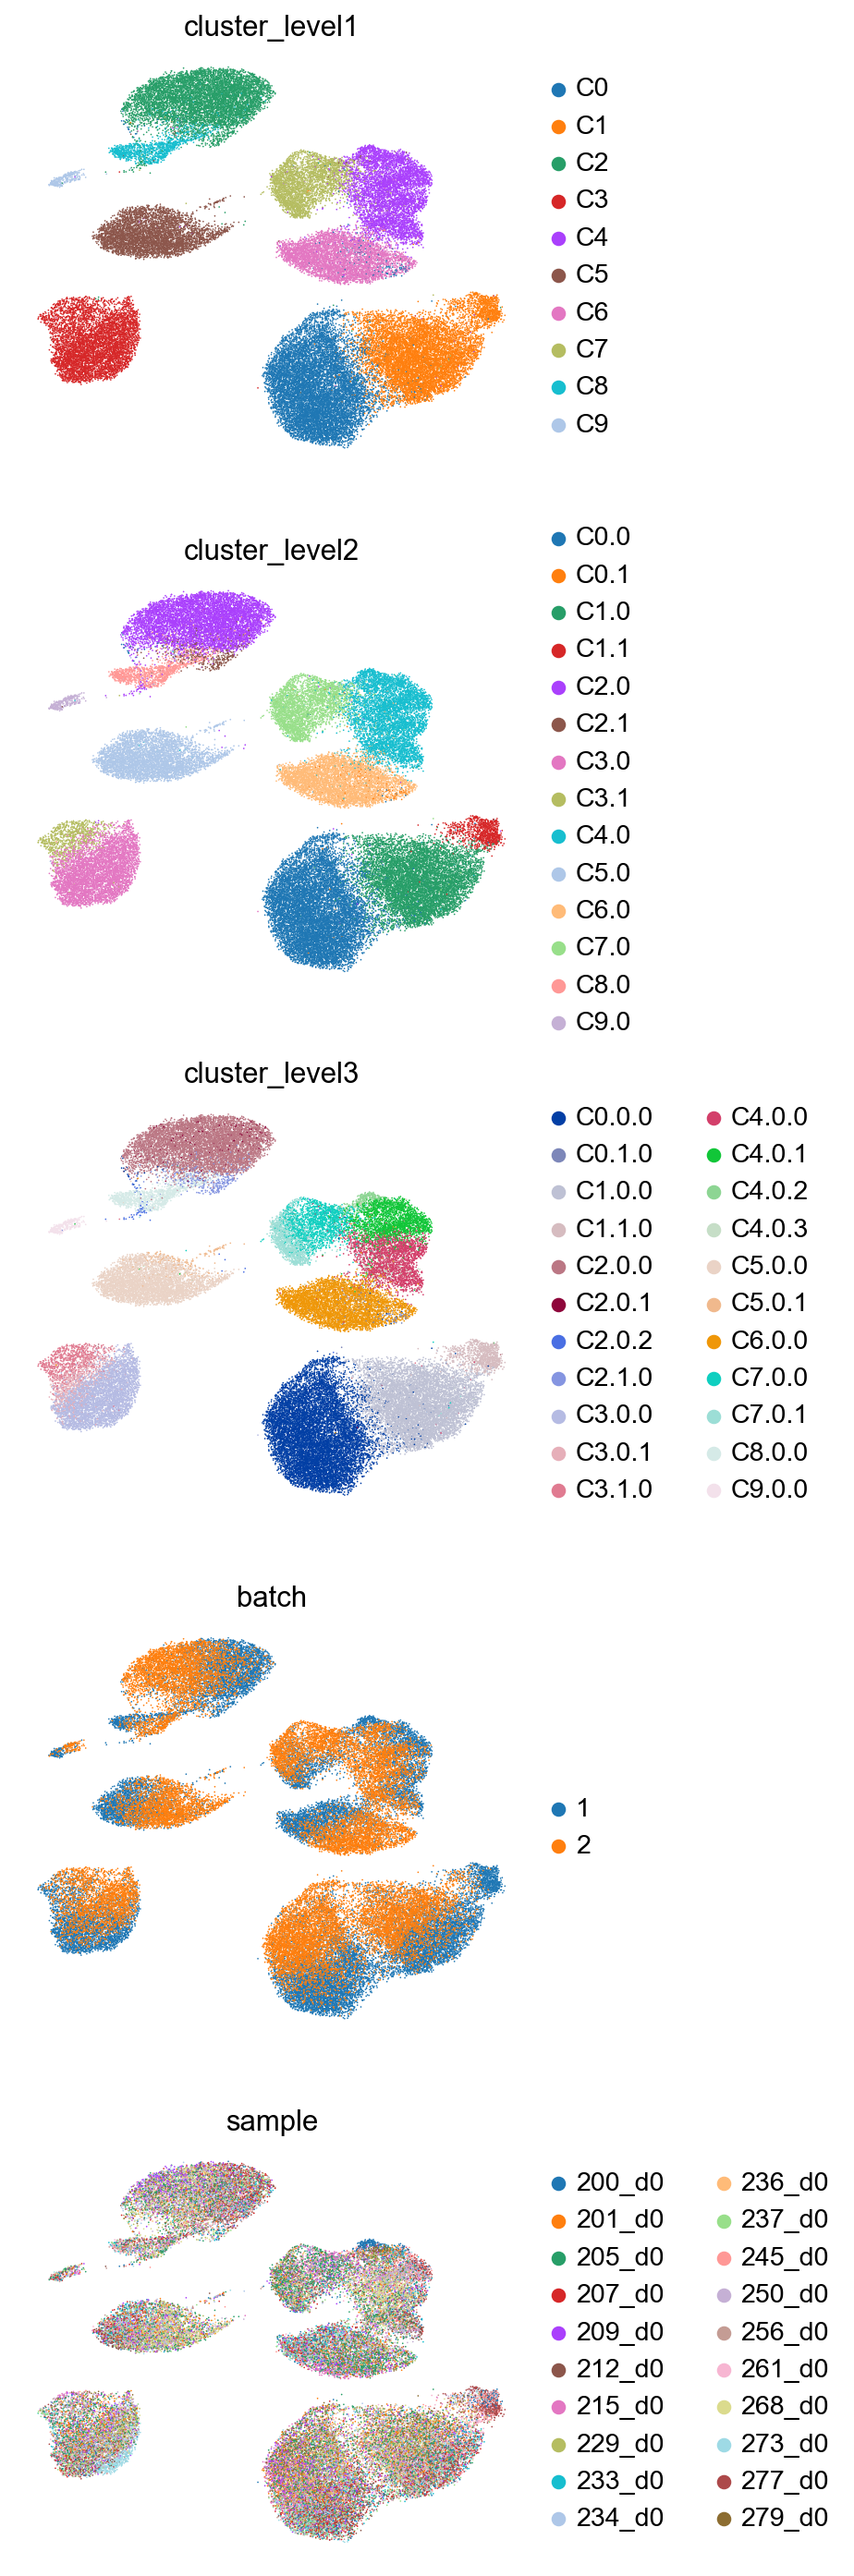

In [70]:
sc.pl.umap(cite, color=['cluster_level1', 'cluster_level2', 'cluster_level3', 'batch', 'sample'], frameon=False, ncols=1)

## Find common cells

In [71]:
com_index = set(scrna.obs.index) & set(cite.obs.index)
scrna = scrna[scrna.obs.index.isin(com_index)]
cite = cite[cite.obs.index.isin(com_index)]
print(scrna.shape, cite.shape)

/Users/alitinet/opt/miniconda3/envs/sclab/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


(53196, 3999) (53196, 87)


In [72]:
scrna.write(SCRNA_DIR + 'expressions.h5ad')

In [73]:
cite.write(SCCITE_DIR + 'protein.h5ad')